# Task 0

## Question 1

In [11]:
import pandas as pd # use pandas to import two csv
import numpy as np
from scipy import stats
from matplotlib import pyplot as mp
from sklearn.model_selection import train_test_split
df = pd.read_csv('mp1_av_disengagements.csv') 
df1 = pd.read_csv('mp1_av_totalmiles.csv')



## Question 2

### a.

In [2]:
# use sum() to calculate total number of AV disengagements over the entire duration
df1['total number of disengagements'].sum() 

1024

### b.

In [3]:
#nuique() gives number of unique value in Month columns(excluding null values)
df['Month'].nunique()

15

### c.

In [4]:
# unique() returns all the unique entries 
df.Month.unique()

array(['14-Sep', '14-Oct', '14-Nov', '14-Dec', '15-Jan', '15-Feb',
       '15-Mar', '15-Apr', '15-May', '15-Jun', '15-Jul', '15-Aug',
       '15-Sep', '15-Oct', '15-Nov'], dtype=object)

### d.

In [5]:
#nunique() returns number of unique value in specific columns 
df['Cause'].nunique()

10

### e.

In [6]:
# isnull() is used to detect any missing values
# sum() is used to calculate number of missing values for each attribute
print('av_disengagement.csv has ' + str(sum(df.isnull().sum())) + " NA values") # for df imported from av_disengagement.csv
print('totalmiles.csv has ' + str(sum(df1.isnull().sum())) + " NA values") # for df1 imported from totalmiles.csv



av_disengagement.csv has 532 NA values
totalmiles.csv has 0 NA values


## Question 3

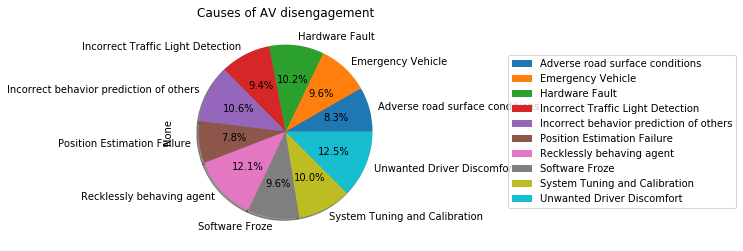

In [12]:
# plot based on Cause attribute, so use groupby() by this attribute
# autopct() to show percentage
plot = df.groupby(['Cause']).size().plot.pie(y = 'Cause',autopct='%1.1f%%',shadow = True)
plot.legend(loc='center left', bbox_to_anchor=(1.5, 0.5)) # show legend 
plot.set_title('Causes of AV disengagement') # set title
mp.savefig('foo.png')

### Based on pie chart, the top 2 cause are "Unwanted Driver Discomfort" and "Recklessly behaving agent"

## Question 4

In [14]:
# group the data by month
trend_df = df1.groupby(['Month'],sort = False)[['miles driven in autonomous mode','total number of disengagements']].sum()


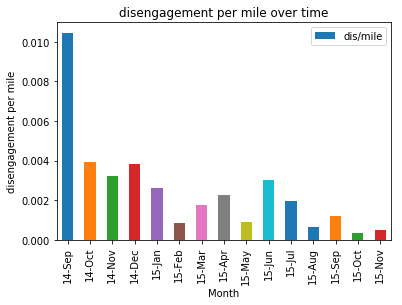

In [15]:
# create disengagement/mile entries coresponding to each month
trend_df['dis/mile'] = trend_df['total number of disengagements']/ trend_df['miles driven in autonomous mode']
# plot the disengagement/mile over every months to see the trend 
trend = trend_df.plot.bar(y = 'dis/mile',title = 'disengagement per mile over time')
trend.set_ylabel('disengagement per mile')
mp.savefig('foo.png')


#### Conclusion: In general, total number of disengagement per mile is decreasing over time.  The AV is seemingly maturing over time.

# Task 1

## Question 1

### a.

### Gaussian distribution :  large amount of samples fall close to the mean, a few amount of samples are some deviation away from the mean



### b.Exponential distribution: events occur continuously and independently at a constant rate, where the samples lie are independent from time.
     

### c. Weibull distribution: the failure rate is proportional to a power of time. Large amount of samples will be centered around a certain point.

## Question 2

Text(0.5, 1.0, 'probability distribution of reaction time')

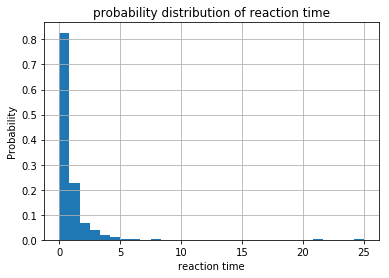

In [10]:
# plot the probability distribution of reactionTime 
# use hist() to plot histogram and range() to better show general trend
his_reaction = (df['ReactionTime']).hist(bins = 30,density = True)
his_reaction.set_xlabel('reaction time')
his_reaction.set_ylabel('Probability')
his_reaction.set_title('probability distribution of reaction time')

### This distirbution fits a welbuli distribution.This signifies that It is common to see a large amount of reaction time happen within a small interval(0-2 seconds), and after that, as time increases, it is very unlikely, though not impossible, to see some other samples with long reaction time.

## Question 3

### a.

In [11]:
# mean() gives the mean of the given attribute
# since no restriction is made, this returns mean of reaction time over entire duration
df['ReactionTime'].mean()

0.9297703252032526

### b.

In [19]:
# use nunique() figure out how many unique locations in the dataset
df['Location'].nunique()
# figure out average reaction time at each location
highway_mean = df[df['Location'] == 'highway']['ReactionTime'].mean()
urban_mean = df[df['Location'] == 'urban-street']['ReactionTime'].mean()
print(highway_mean)
print(urban_mean)

1.48
0.9286496945010189


## Question 4

In [13]:
stats.ttest_1samp(df['ReactionTime'].dropna(),1.09) 
# ttest_1samp is provides t statistics and two-tailed p value for one sample t-test

Ttest_1sampResult(statistic=-2.0986037086235854, pvalue=0.03636206696694606)

### Based on the result from 1 sample t test, the two-tailed p value is smaller than 0.05, which means we should reject the null, therefore, the mean reaction time is different for humans in AV cars than in non-AV cars.


## Question 5

Text(0.5, 1.0, 'disengagement per mile with monthly granularity')

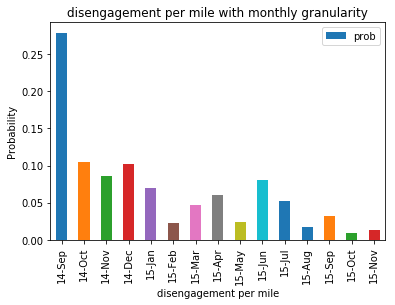

In [14]:
# plot the disengagement per mile with monthly granularity
trend_df['prob'] = trend_df['dis/mile'] / sum(trend_df['dis/mile'])
trend_dis = trend_df.plot.bar(y = 'prob',title = 'probability distribution disengagement per mile over time')
trend_dis.set_xlabel('disengagement per mile')
trend_dis.set_ylabel('Probability')
trend_dis.set_title('disengagement per mile with monthly granularity')

### Based on the bar plot above, it is very close to exponential(also welbuli with adaquate parameters) distribution.if samples are drawn from a random variable that follows the exponential distribution, the samples tell us the likelihood of the result of an experiement is memoryless and will decrease fast at the beginning and get slow down as the time increase, and it will converge to 0. So this signifies that the dis/mile will become fewer in the future theortically which is a nice thing.


# Task2

## Question 1

### a. The assumption on maximum number of disengagements in a mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a  Bernoulli Distribution

### Since this is just n (miles) independent Bernouli trials, we can model them by binomial distirbution, so in general P should be number of success(disengagement) / number of trials(miles)

In [15]:

car_weather_type = df.groupby(['Weather','TypeOfTrigger']).size().unstack() # make new data collection based on two featuers
car_miles_and_dis = df1.sum() # to get total miles driven in autonomous mode
cloud_miles = car_miles_and_dis.iloc[2] * 0.28 # miles driven in cloud day
clear_miles = car_miles_and_dis.iloc[2] * 0.72 # miles driven in clear day
car_weather_type

TypeOfTrigger,automatic,manual
Weather,,
clear,96,93
cloudy,397,438


### b.

In [16]:
p_dis_cloud = car_weather_type.iloc[1].sum() / cloud_miles  # probability of disengagement in cloud day 
p_dis_cloud # probability of disengagement in cloud day

0.005902556775527249

### c.

In [17]:
p_dis_clear = car_weather_type.iloc[0].sum() / clear_miles   #  probability of  disengagement in clear day 
p_dis_clear # probability of disengagement in clear day

0.0005195663748517998

### d.

In [18]:
p_dis_clear_auto = car_weather_type.iloc[0]['automatic'] / clear_miles # automatic disengagement per mile on clear day
p_dis_cloud_auto = car_weather_type.iloc[1]['automatic'] / cloud_miles # automatic disengagement per mile on clear day
print(p_dis_clear_auto,p_dis_cloud_auto)

0.00026390673008345393 0.0028063653172267283


### e.

### using binomial distribution to calculate the p value(which is the calculated probability of X >= 150 / 10000 given p) to obtain the probability we want

In [19]:
stats.binom_test(x= 150 , n = 10000, p = p_dis_cloud,alternative= 'greater' )

1.987144942327803e-23

## Question 2

### using one-sided binomial test; p value is very small, so reject nulll, so weather plays an important role for AVs

In [20]:
stats.binom_test(x= len(df[df['Weather'] == 'cloudy'].index), n = len(df), p = 0.28,alternative= 'greater' )

4.438051320043669e-278

## Question 3

### a.

In [21]:
reac_cloud = df[df['Weather'] == 'cloudy']['ReactionTime'].dropna()
p_cloud_reac = sum(reac_cloud > 0.5) / len(reac_cloud)
p_cloud_reac  # p(>0.5|cloud)

0.5429292929292929

### b.

In [22]:
reac_clear = df[df['Weather'] == 'clear']['ReactionTime'].dropna()
p_clear_reac = sum(reac_clear > 0.7) / len(reac_clear)
p_clear_reac    # p(>0.7|clear)

0.3854166666666667

## Question 4

### using law of probability P(accident) = P(accident,clear) + P(accident,cloudy)(all of these assume automatic disengagement)

In [23]:
p_av_accident = p_dis_clear_auto * p_clear_reac + p_dis_cloud_auto * p_cloud_reac
p_av_accident  # probability of accident per mile involving an AV disengagement 

0.001625371989602863

## Question 5

In [24]:
ratio = p_av_accident / 2e-6
ratio

812.6859948014315

### Since AV disengagement is about 812 times more dangerous than human driver, the Avs tech still needs to be improved

# Task3

## Question 1

In [25]:
def label_class(row):
    if row['Cause'] == 'Incorrect behavior prediction of others':
        return 'Controller'
    if row['Cause'] == 'Recklessly behaving agent': 
        return 'Controller'
    if row['Cause'] == 'Unwanted Driver Discomfort': 
        return 'Controller'
    if row['Cause'] == 'Adverse road surface conditions':
        return 'Perception System'
    if row['Cause'] == 'Emergency Vehicle':
        return 'Perception System'
    if row['Cause'] == 'Position Estimation Failure':
        return 'Perception System'
    if row['Cause'] == 'Incorrect Traffic Light Detection':
        return 'Perception System'
    if row['Cause'] == 'System Tuning and Calibration':
        return 'Computer System'
    if row['Cause'] == 'Hardware Fault':
        return 'Computer System'
    if row['Cause'] == 'Software Froze':
        return 'Computer System'
    
    

In [26]:
df['Class'] = df.apply (lambda row: label_class (row),axis=1)

## Question 2

In [27]:
X_train, X_test,Y_train,Y_test = train_test_split(df[['Location','Weather','TypeOfTrigger']],df['Class'],test_size=0.2,random_state = 0)

## Question 3

In [28]:
def NBmodel(X_train,Y_train):
    X_train['Class'] = Y_train.values
    # Since each attribute is binary, change the string value to 1 or 0 to facilitate calculation
    X_train.loc[X_train['Location'] == 'highway',['Location']] = 1 # highway = 1
    X_train.loc[X_train['Location'] == 'urban-street',['Location']] = 0 # urbanstreet = 0
    X_train.loc[X_train['Weather'] == 'cloudy',['Weather']] = 1 # cloudy = 1
    X_train.loc[X_train['Weather'] == 'clear',['Weather']] = 0 # clear = 0
    X_train.loc[X_train['TypeOfTrigger'] == 'automatic',['TypeOfTrigger']] = 1 # automatic = 1
    X_train.loc[X_train['TypeOfTrigger'] == 'manual',['TypeOfTrigger']] = 0 # manual = 0
    
    # mean_df is probability of given features given in different Class
    mean_df = (X_train.groupby('Class').agg("sum")) / (X_train.groupby('Class').count()) 
    # p_class is probability for each Class
    p_class = X_train['Class'].value_counts() / len(X_train['Class'])
    return mean_df,p_class

In [29]:
mean_df, p_class = NBmodel(X_train,Y_train) # parameters we get from training model; we will use them to help us to predict new labels and calculate accuracy

## Question 4

In [30]:
def cal_accuracy(X_test,Y_test,mean_df,p_class):
    predict_label = []
    X_test['Class'] = Y_test.values
    X_test.loc[X_test['Location'] == 'highway',['Location']] = 1 # highway = 1
    X_test.loc[X_test['Location'] == 'urban-street',['Location']] = 0 # urbanstreet = 0
    X_test.loc[X_test['Weather'] == 'cloudy',['Weather']] = 1 # cloudy = 1
    X_test.loc[X_test['Weather'] == 'clear',['Weather']] = 0 # clear = 0
    X_test.loc[X_test['TypeOfTrigger'] == 'automatic',['TypeOfTrigger']] = 1 # automatic = 1
    X_test.loc[X_test['TypeOfTrigger'] == 'manual',['TypeOfTrigger']] = 0 # manual = 0
    for i in range(len(X_test)):
        location = X_test.iloc[i]['Location'] 
        weather = X_test.iloc[i]['Weather']
        trigger = X_test.iloc[i]['TypeOfTrigger']
        p_argmax = np.zeros(3) # store probability of each class given the same features
        for j in range(3):  
            p_lwt = 1.0
            if location == 1:
                p_lwt *= mean_df.iloc[j]['Location']
            else:
                p_lwt *= (1.0 - mean_df.iloc[j]['Location'])
            if weather == 1:
                p_lwt *= mean_df.iloc[j]['Weather']
            else:
                p_lwt *= (1.0 - mean_df.iloc[j]['Weather'])
            if trigger == 1:
                p_lwt *= mean_df.iloc[j]['TypeOfTrigger']
            else:
                p_lwt *= (1.0 - mean_df.iloc[j]['TypeOfTrigger'])
            p_lwt *= p_class.iloc[j]  
            p_argmax[j] = p_lwt # probability of a class given the features
        idx = np.argmax(p_argmax) # figure out the class based on ArgMax
        predict_label.append(mean_df.index[idx]) # append corresponding class to predict_label list
    accuracy = sum(predict_label == X_test['Class'])/ len(X_test) # compare the result and calc accuracy
    return accuracy,predict_label

In [31]:
accuracy,predict_label = cal_accuracy(X_test,Y_test,mean_df,p_class)
print(accuracy)

0.8341463414634146


## Question 5

In [32]:
ave = 0
for i in range(5):
    X_train, X_test,Y_train,Y_test_m = train_test_split(df[['Location','Weather','TypeOfTrigger']],df['Class'],test_size=0.2,shuffle = True) # cross validation
    accuracy, predict_label = cal_accuracy(X_test,Y_test_m,*NBmodel(X_train,Y_train)) # apply model and get accuracy 
    ave = ave + accuracy/5
ave

0.8029268292682927

## Question 6


In [33]:
p_class = Y_test.value_counts() / len(Y_test)
p_class.max() # the probability of the best choice we can make

0.3463414634146341

### If by chance, the best result we can get from the test data set is 0.346, which is to always choose percetion system as the correct label. The NB model is doing better than chance, since 0.8 > 0.346

## Question 7

### The assumptions are that location, weather, and type of trigger are all independent of each other. This is not really realistic because in real-life situations, location and weather are usually linked, and the type of trigger could depend on the location or the weather condition.

## Question 8

### Classification accuracy may be improved by using bayes network instead of naive bayes, which allows us to use domain knowledge to make reasonable assumption and thus solve the problems then we mentioned in question7. For instance, we know that Given weather is clear, based on our konwledge, the location is more likely at highway than urbans, so we could estimate that the conditional probabilities P(H | Weather = Clear) = 0.65. We can do similar things for other pairs, and this, if done correctly, will help us to get better accuracy.